In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Use seaborn style defaults and set the default figure size and dpi
sns.set(rc={'figure.figsize':(10, 5), 'figure.dpi':300})
sns.set_style("whitegrid")

## Kerr Case

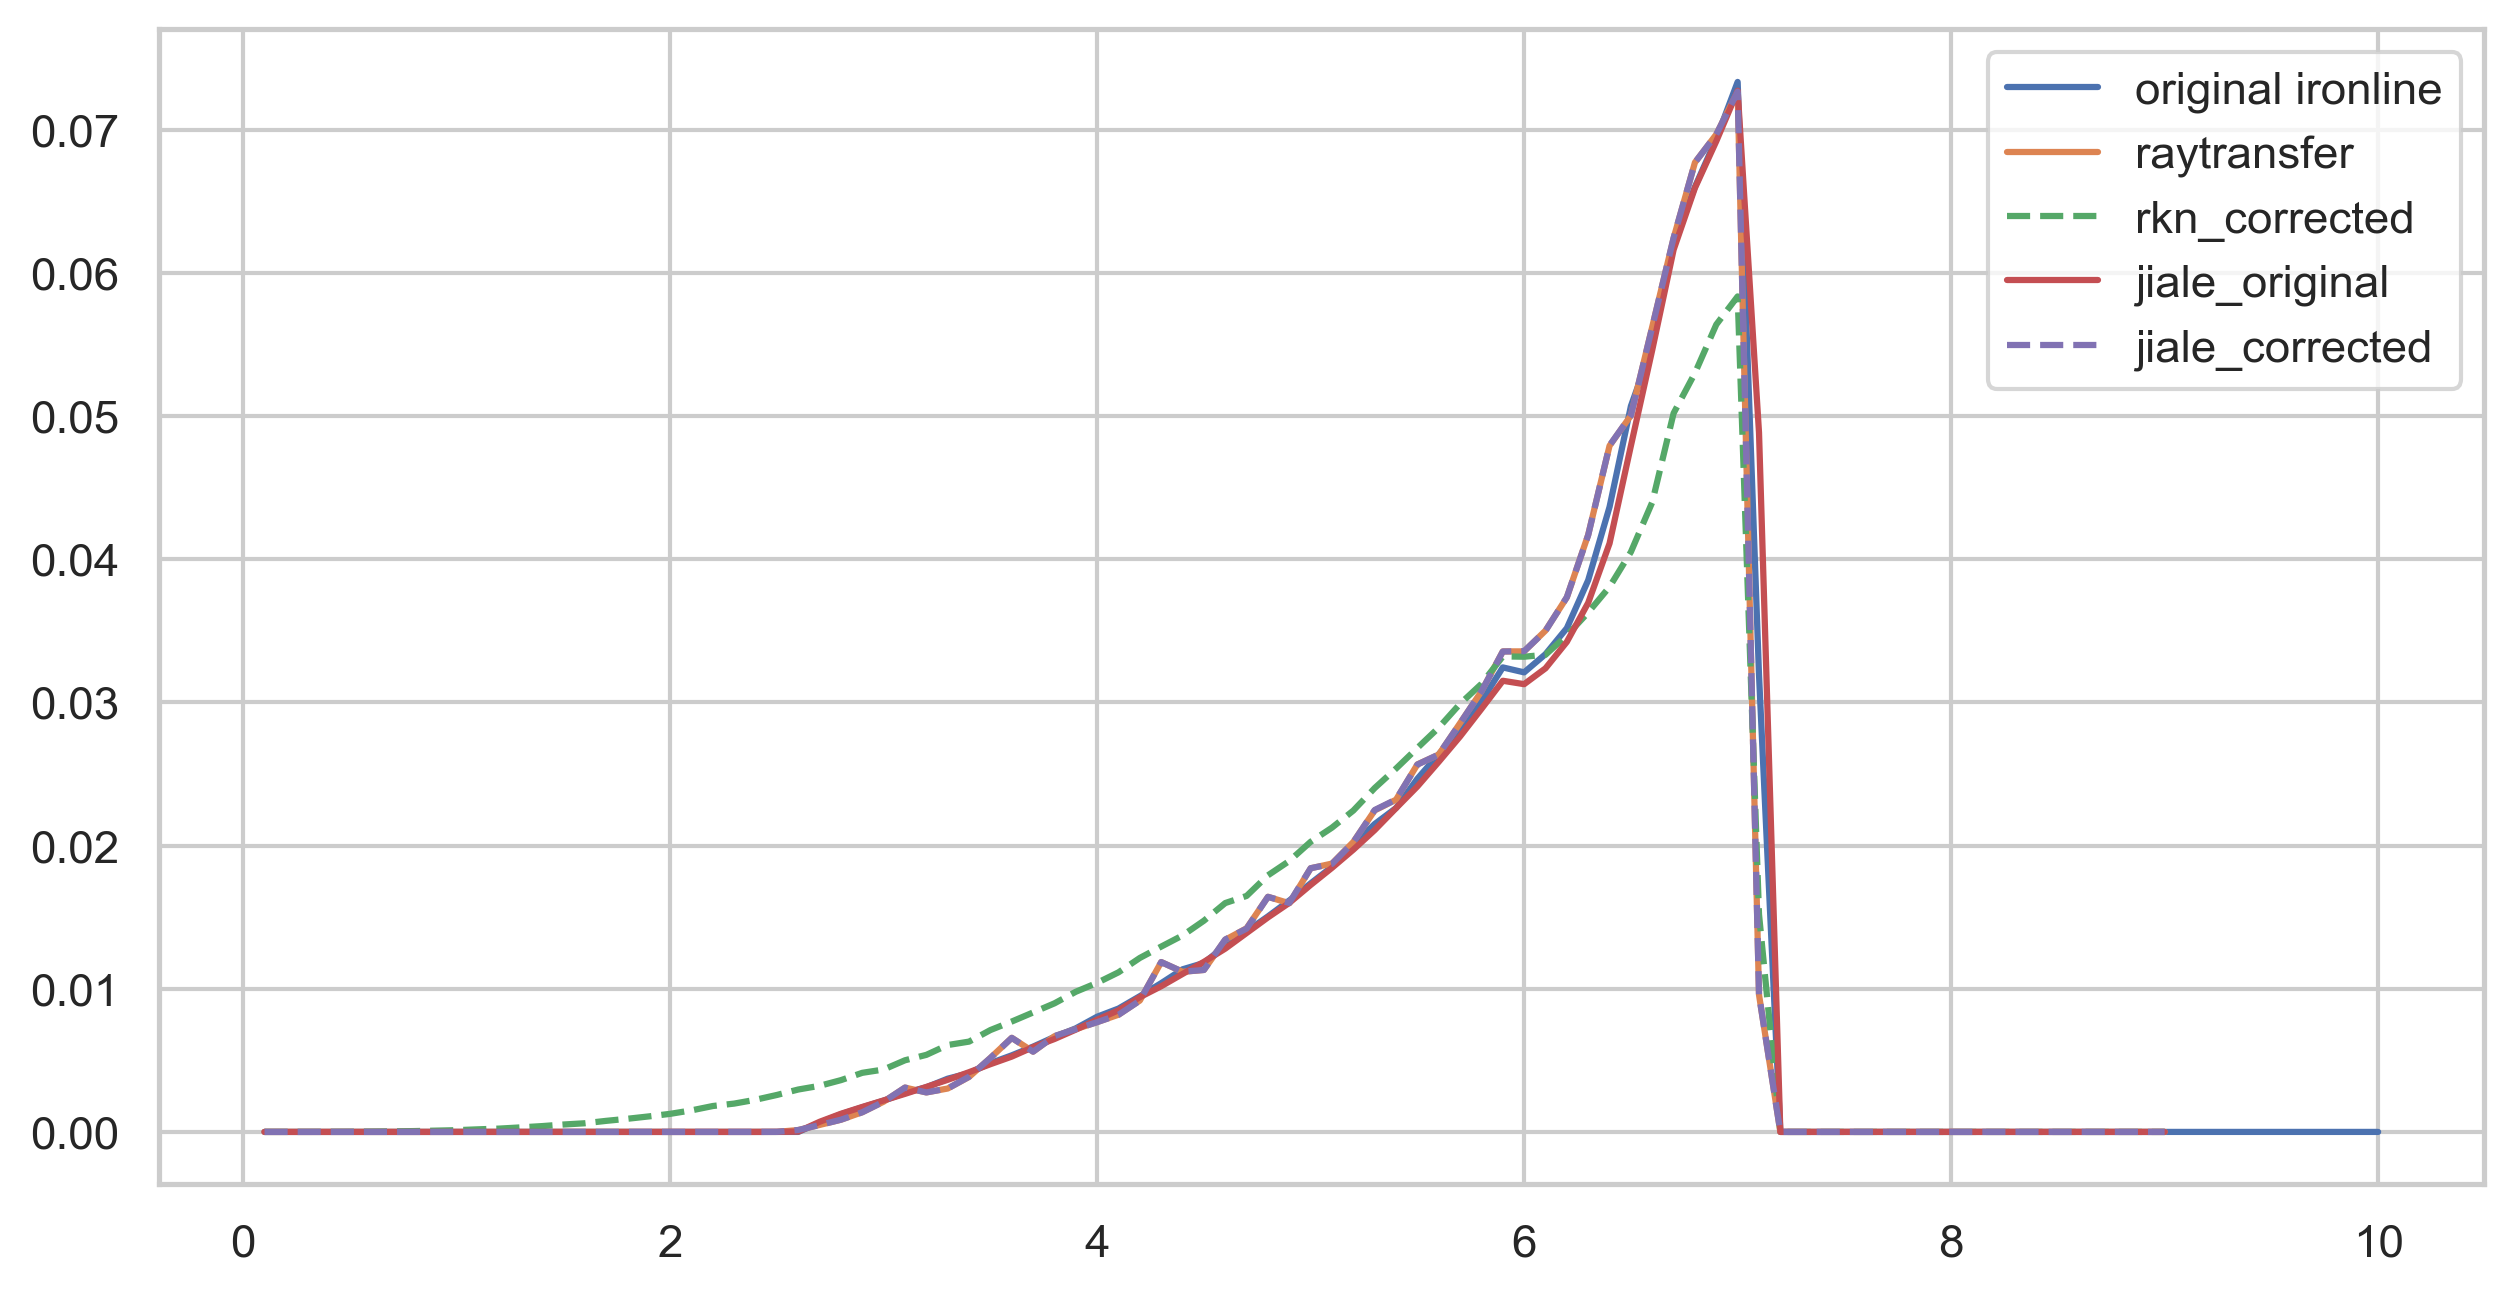

In [9]:
ironline = pd.read_csv(r'C:\Users\WalkerXin\Downloads\compare\e-5.dat', sep=' ', header=None)
data_raytransfer = pd.read_csv(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\iron_a0.500.def0.00.i45.00_raytransfer.dat', sep=' ', header=None)
data_rkn = pd.read_csv(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\iron_a0.500.def0.00.i45.00_rkn_corrected.dat', sep=' ', header=None)
data_jiale_original = pd.read_csv(r'C:\Users\WalkerXin\Downloads\jiale\iron_a0.500.b1_0.00.i45.00.dat', sep=' ', header=None)
data_jiale_corrected = pd.read_csv(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\iron_a0.500.def0.00.i45.00_jiale_corrected.dat', sep=' ', header=None)

plt.plot(ironline[0], ironline[1], label='original ironline')
plt.plot(data_raytransfer[0], data_raytransfer[1], label='raytransfer')
plt.plot(data_rkn[0], data_rkn[1], label='rkn_corrected', linestyle='--')
plt.plot(data_jiale_original[0], data_jiale_original[1], label='jiale_original')
plt.plot(data_jiale_corrected[0], data_jiale_corrected[1], label='jiale_corrected', linestyle='--')

plt.legend()
plt.show()

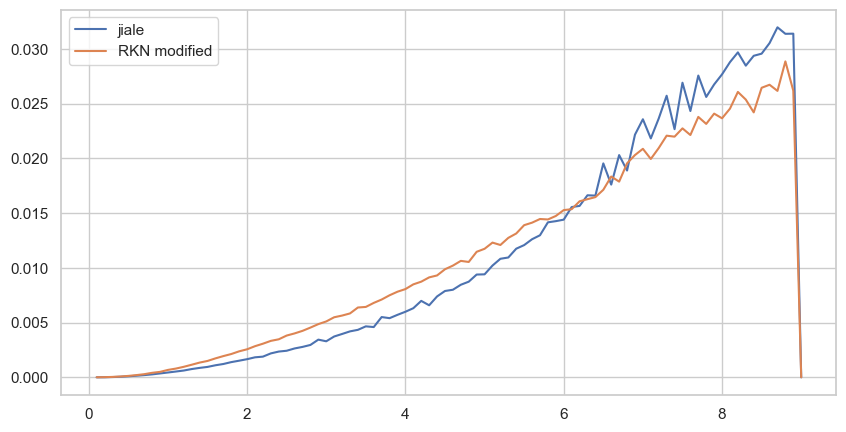

In [21]:
compare = pd.read_csv(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\iron_a0.998.def10.00.i70.00_compare.dat', sep=' ', header=None)
data1 = pd.read_csv(r'C:\Users\WalkerXin\Downloads\jiale\iron_a0.998.b1_10.00.i70.00.dat', sep=' ', header=None)
data2 = pd.read_csv(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\data\iron_a0.998.def10.00.i70.00_gtr.dat', sep=' ', header=None)
original = pd.read_csv(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\iron_a0.998.def10.00.i70.00.dat', sep=' ', header=None)

# plt.plot(compare[0], compare[1], label='compare')
plt.plot(data1[0], data1[1], label='jiale')
# plt.plot(data2[0], data2[1], label='highres')
plt.plot(original[0], original[1], label='RKN modified')

plt.legend()
plt.show()

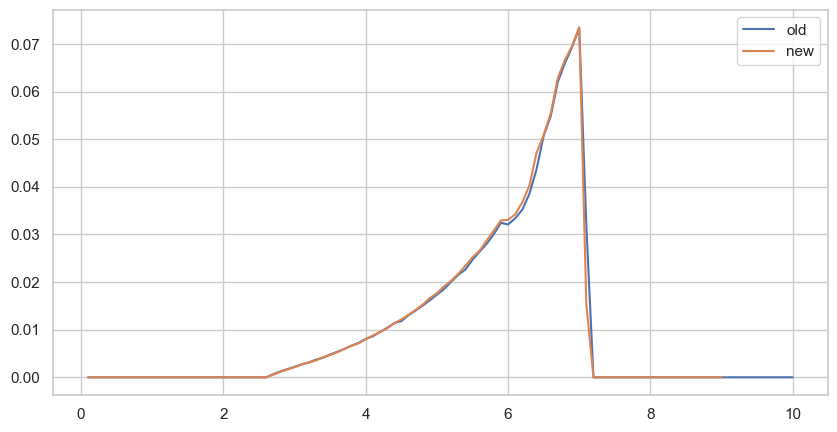

In [17]:
old = pd.read_csv(r'C:\Users\WalkerXin\Downloads\compare\e-5.dat', sep=' ', header=None)
new = pd.read_csv(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\data\iron_a0.500.def0.00.i45.00_grp.dat', sep=' ', header=None)

plt.plot(old[0], old[1], label='old')
plt.plot(new[0], new[1], label='new')

plt.legend()
plt.show()

In [12]:
def subplots(file_dir: str, spin_list: list, defpar_list:list, inc_list: list, component: str):
    filename_format = file_dir + "\iron_a{:.3f}.def{:.2f}.i{:.2f}_" + f"{component}" + ".dat"
    output_name = "ironline_" + f"{component}" + ".png"
    counter = 0

    plt.figure(figsize=(22, 22), dpi=300)

    for i in range(3):
        for j in range(3):
            plt.subplot(3,3,3*i+j+1)
            for k in range(3):
                filename = filename_format.format(spin_list[i], defpar_list[k], inc_list[j])
                try:
                    data = pd.read_csv(filename, sep=' ', header=None)
                    plt.plot(data[0], data[1], label='def={:.2f}'.format(defpar_list[k]))
                    counter += 1
                except:
                    continue
            
            # Show legend (deformation) for the first subplot only
            if i == 0 and j == 0:
                plt.legend()

            # Show title (inclination) for first row only
            if i == 0:
                plt.title('i = {:.0f} degrees'.format(inc_list[j]))

            # Show y label (spin) for last column only, put to the right of the subplot
            if j == 2:
                plt.text(1.05, 0.5, 'a = {:.3f}'.format(spin_list[i]), ha='center', va='center', rotation='vertical', transform=plt.gca().transAxes)

            # Adjust the x and y scale
            plt.xlim(0, 9.1)
            plt.ylim(0, 0.1)

    fig = plt.gcf()
    fig.tight_layout()

    # Define the common x and y labels
    fig.text(0.5, -0.01, 'Energy (keV)', ha='center', va='center')
    fig.text(-0.01, 0.5, 'Fraction of photons', ha='center', va='center', rotation='vertical')
    
    # Add overall title
    fig.text(0.5, 1.01, 'Iron lines with deformed {} component'.format(component), ha='center', va='center', fontsize=20)
    fig.savefig(output_name, bbox_inches='tight', dpi=300)

    print('Total number of plots: {}'.format(counter))
    plt.show()

Total number of plots: 27


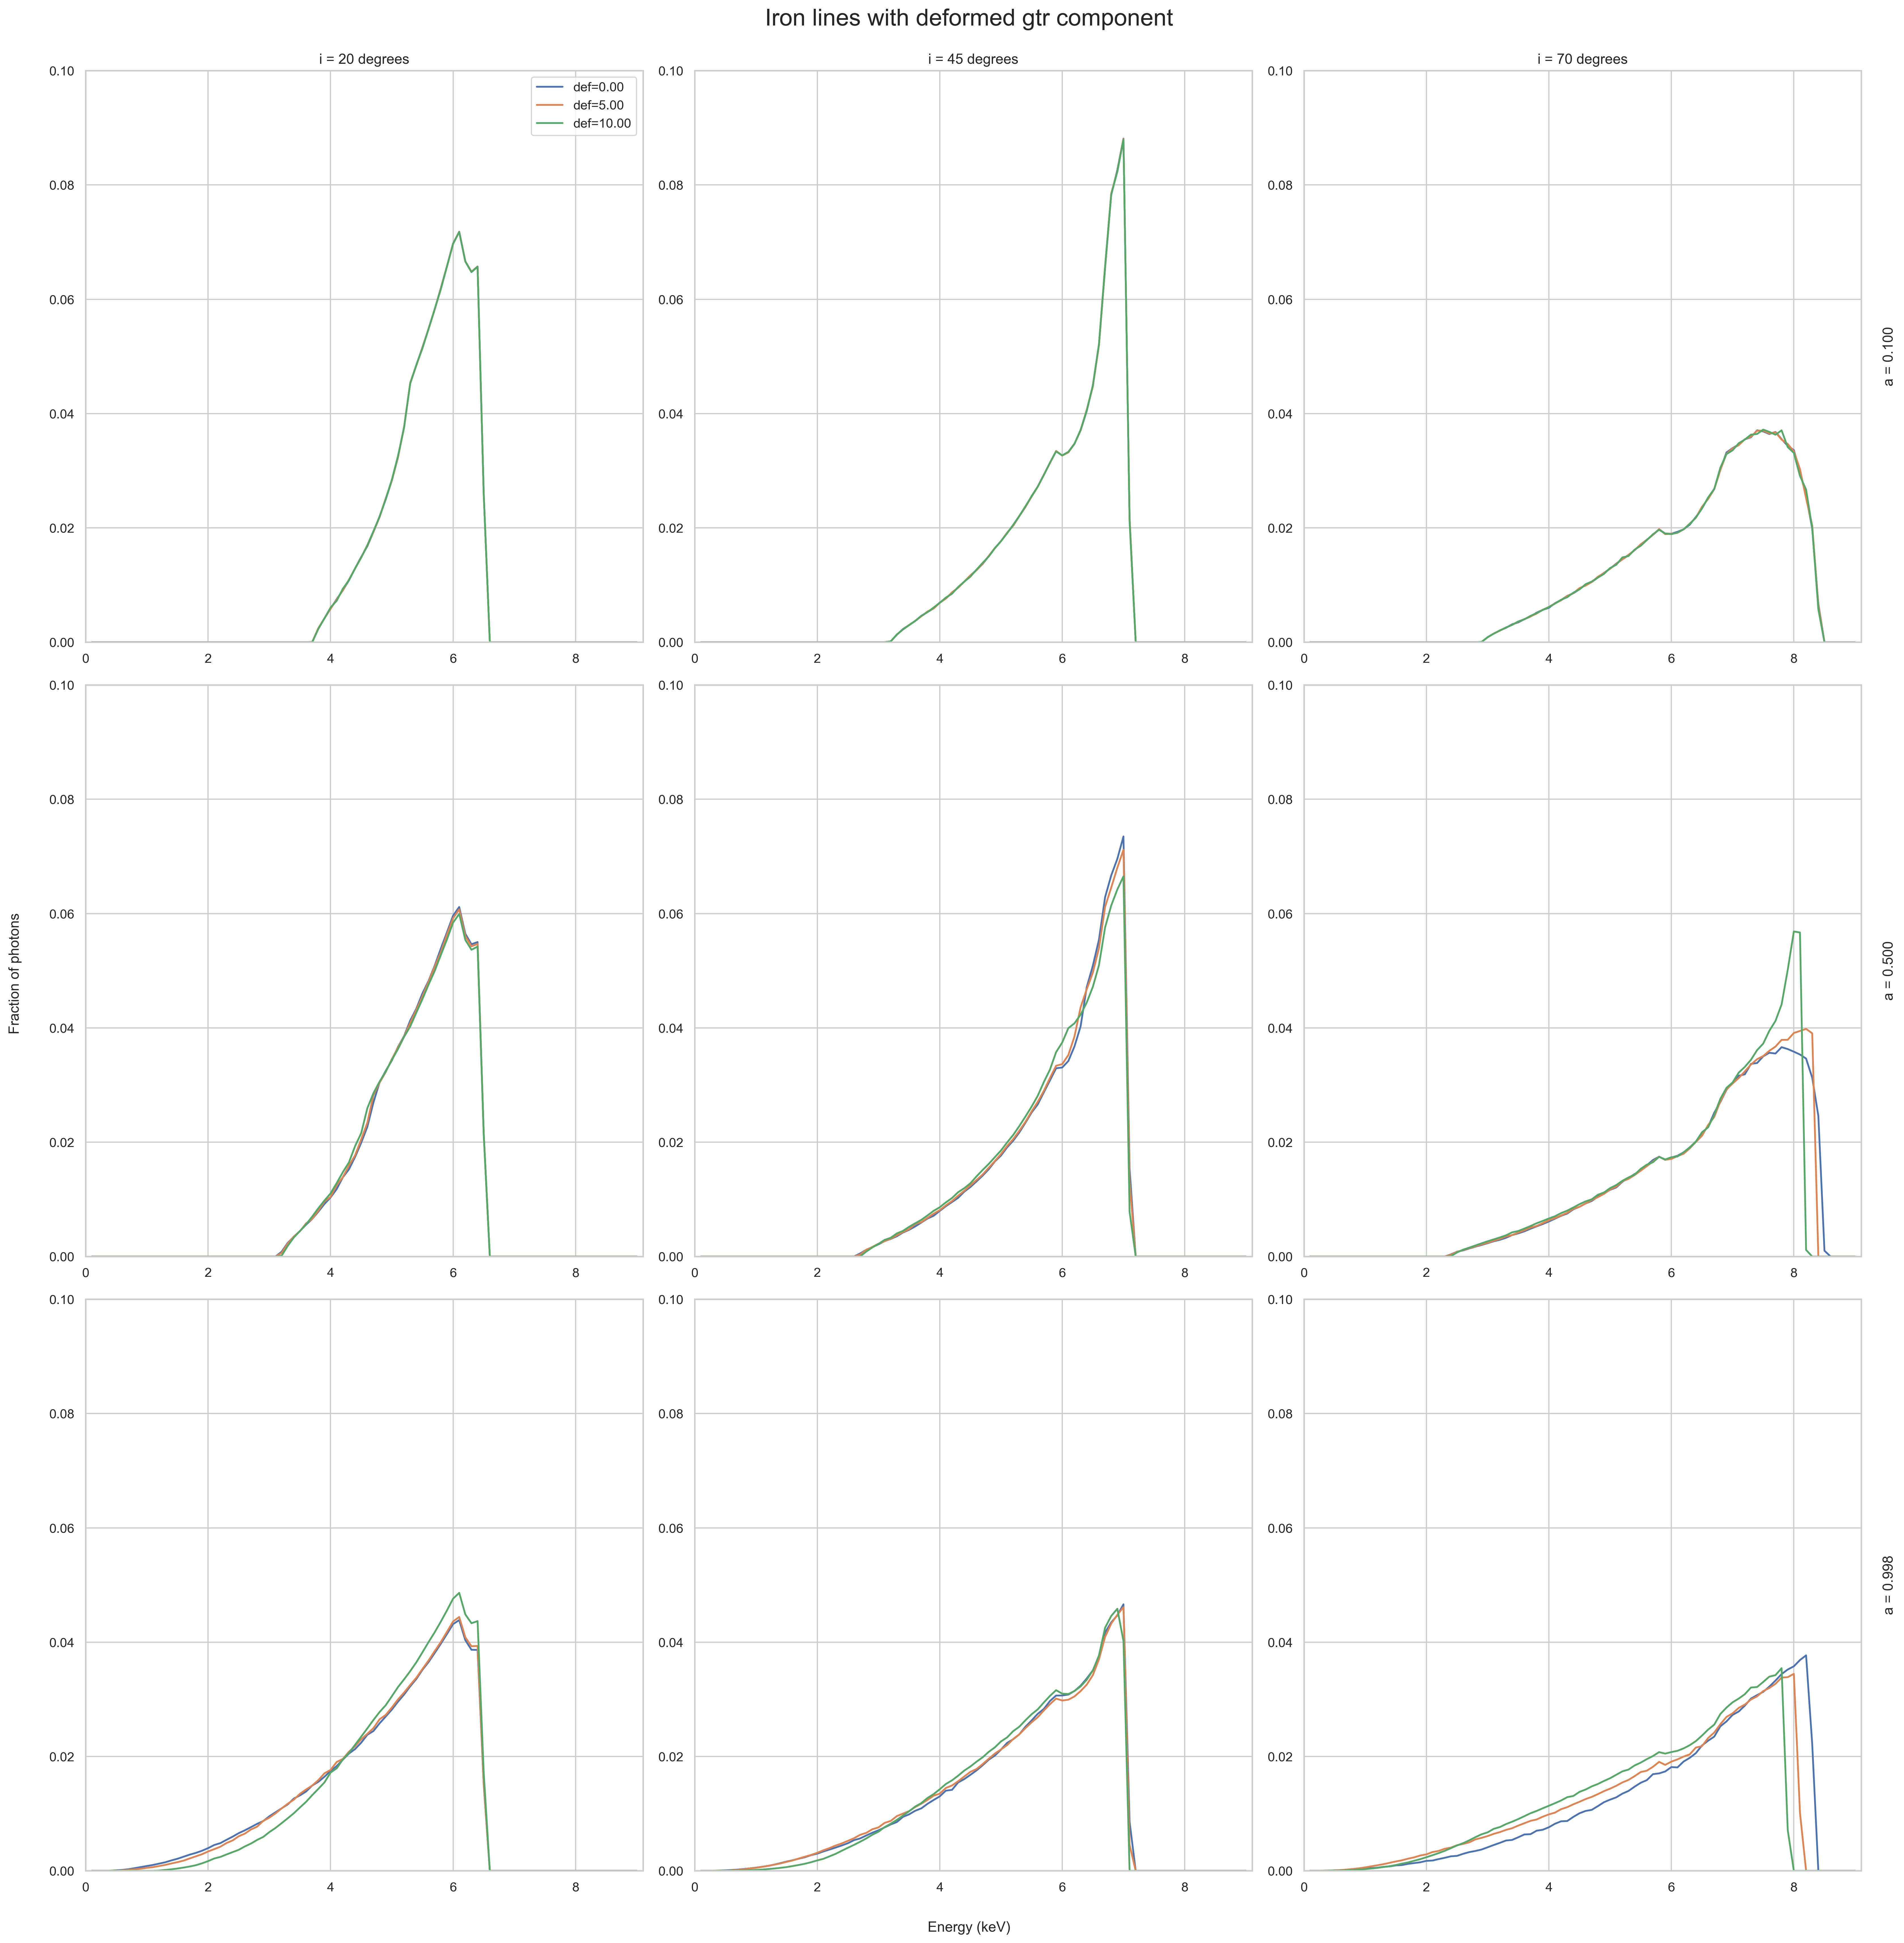

In [13]:
spin_list = [0.10, 0.50, 0.998]
defpar_list = [0.00, 5.00, 10.00]
inc_list = [20.0, 45.0, 70.0]

subplots(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\data', spin_list, defpar_list, inc_list, 'gtr')

Total number of plots: 27


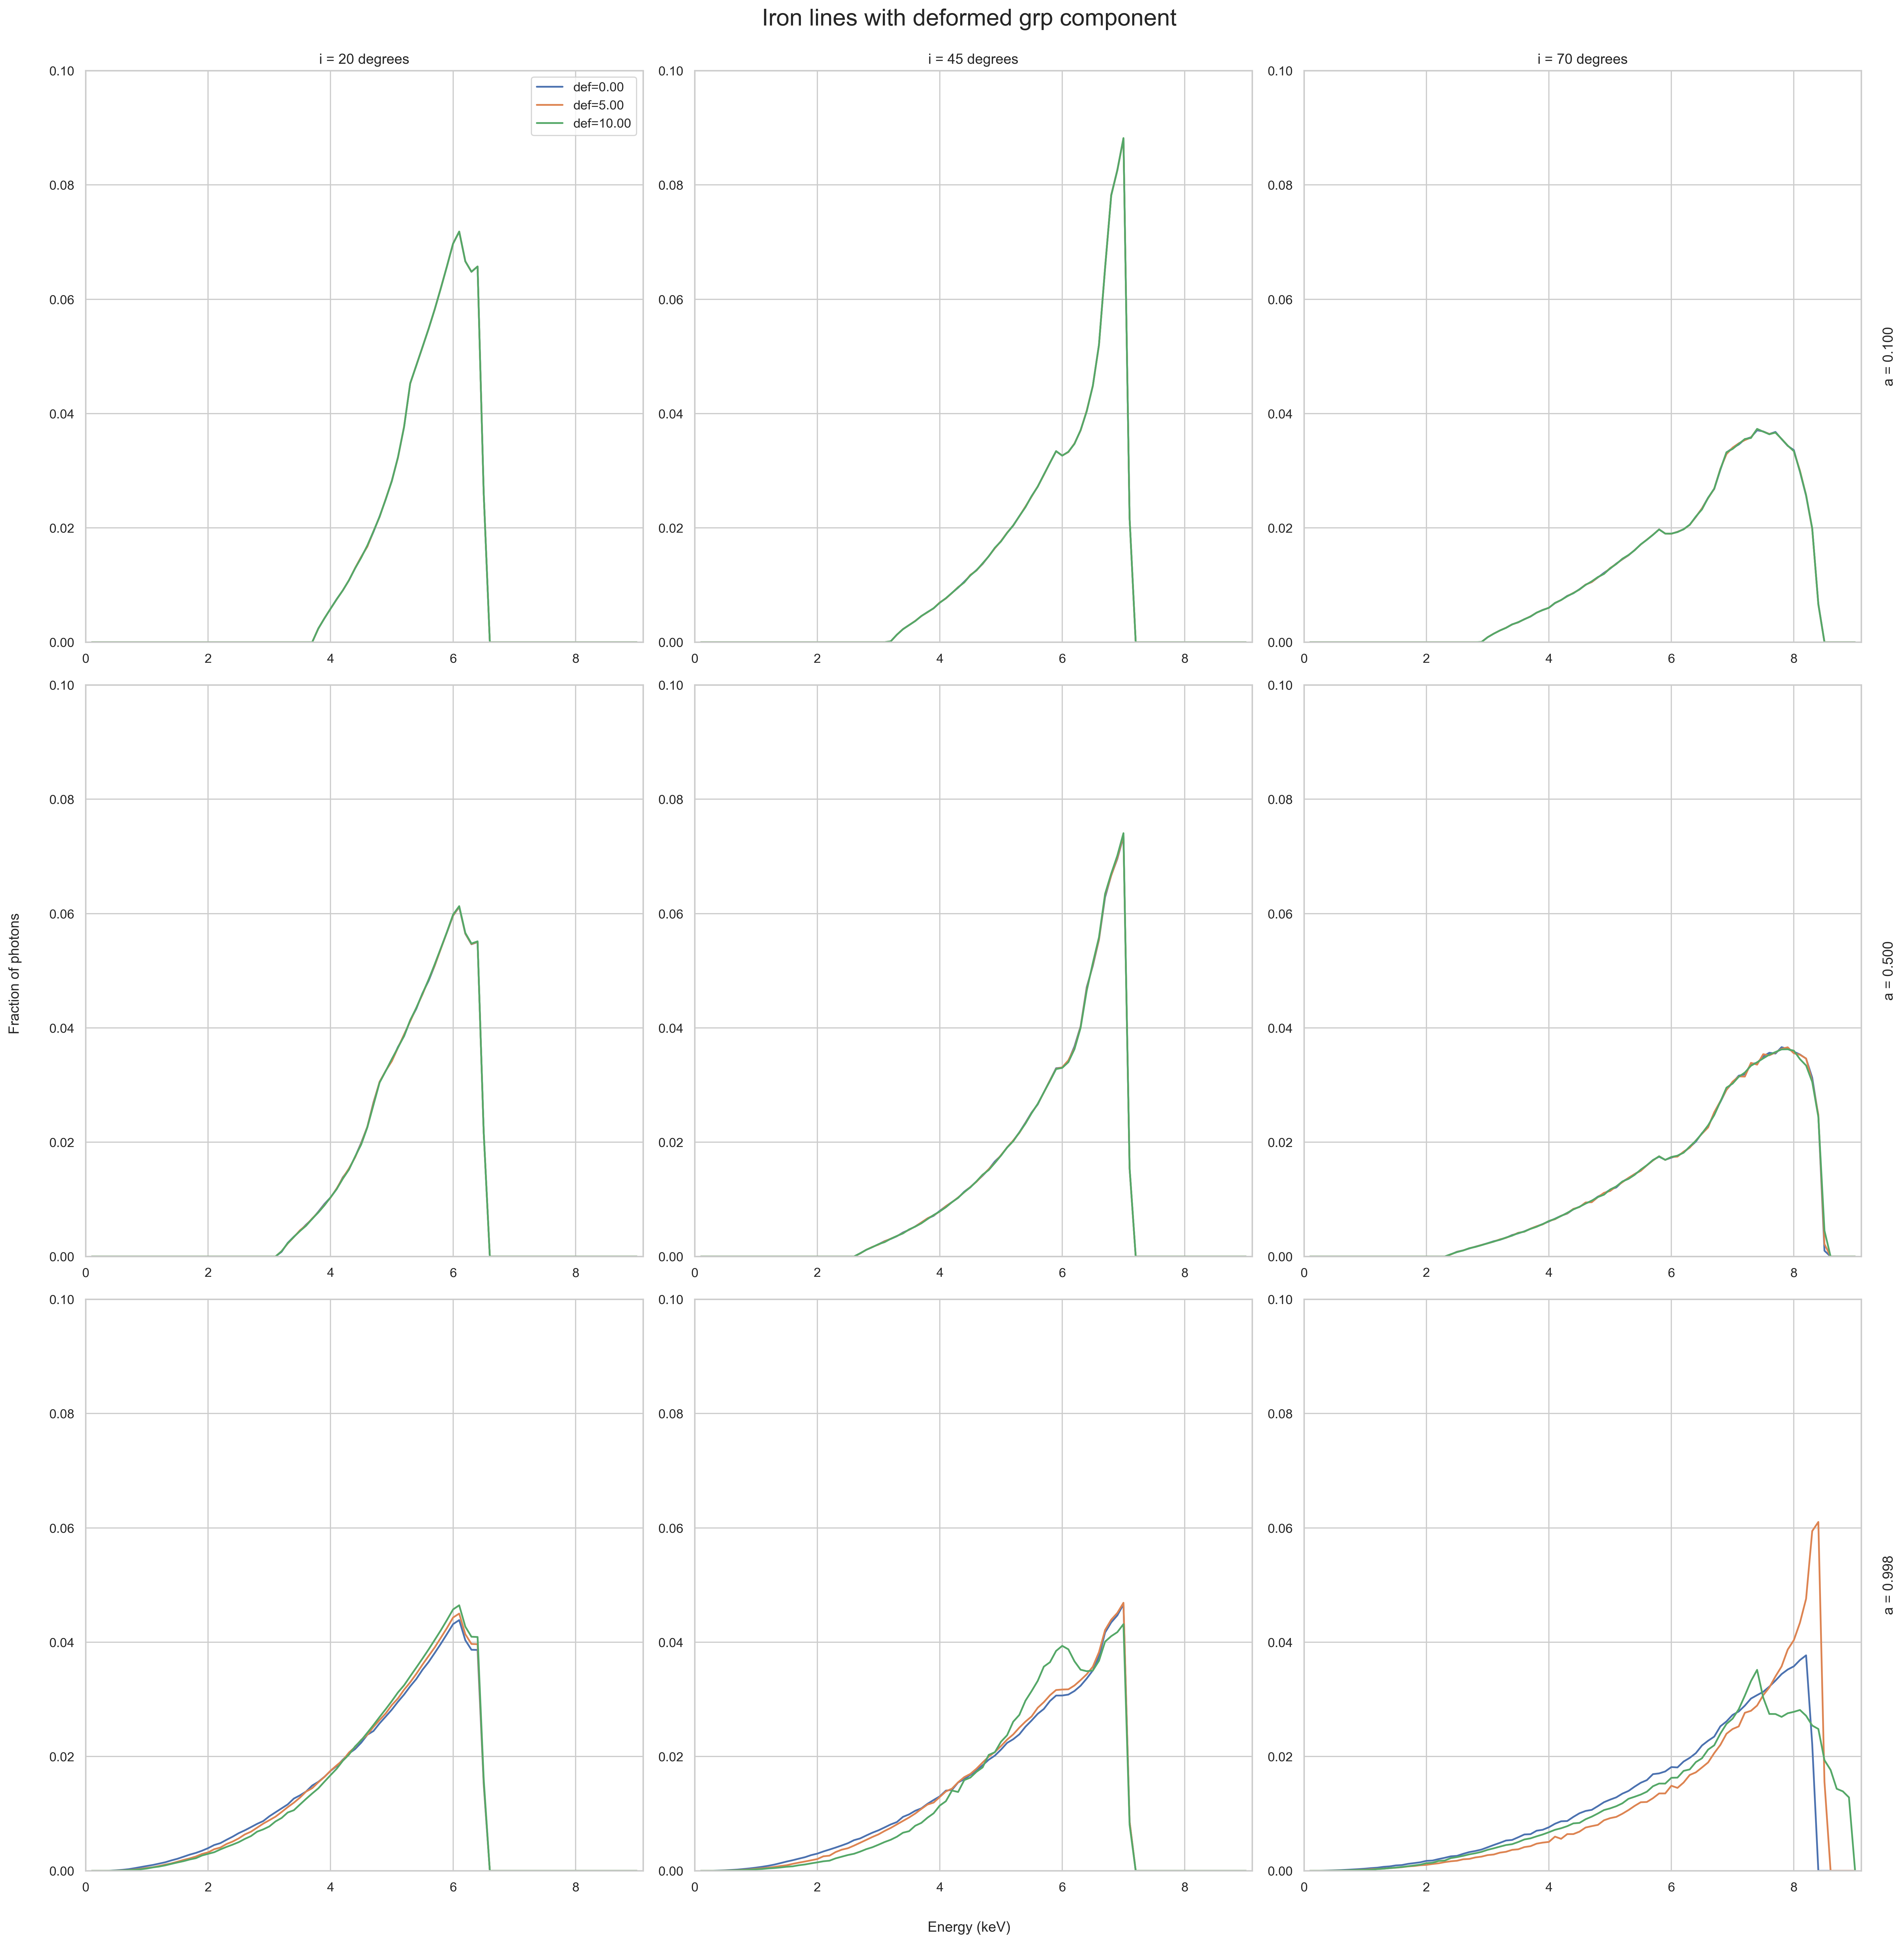

In [18]:
spin_list = [0.10, 0.50, 0.998]
defpar_list = [0.00, 5.00, 10.00]
inc_list = [20.0, 45.0, 70.0]

subplots(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\data', spin_list, defpar_list, inc_list, 'grp')